# **3.1 General requirements**

In [8]:
import pandas as pd

# Load the dataset
file_path = '/content/221100911_Seleem_Data (1).csv'  # Update the path if needed
data = pd.read_csv(file_path)

# Step 3: Count total number of users and movies
tnu = data['userId'].nunique()  # Count unique users
tni = data['movieId'].nunique()  # Count unique movies

# Step 5: Count the number of ratings for every product
ratings_per_movie = data['movieId'].value_counts()  # Count ratings for each movie

# Output the results
print(f"Total number of users (tnu): {tnu}")
print(f"Total number of movies (tni): {tni}")
print("\nNumber of ratings per movie:")
print(ratings_per_movie)

Total number of users (tnu): 610
Total number of movies (tni): 9724

Number of ratings per movie:
movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64


In [16]:
import pandas as pd
import random

# Load the dataset
file_path = '/content/221100911_Seleem_Data (1).csv'  # Update path if needed
dataset = pd.read_csv(file_path)

# Step 6: Adjust user ratings to simulate the exact missing values
# Pivot the data to create a user-item matrix
user_item_matrix = dataset.pivot_table(index='userId', columns='movieId', values='rating')

# Find users with the closest missing ratings
missing_ratings = user_item_matrix.isnull().sum(axis=1).sort_values()

# Select top 3 users for adjustment
candidate_users = missing_ratings.index.tolist()[:3]
U1, U2, U3 = candidate_users[0], candidate_users[1], candidate_users[2]

# Adjust users to have exactly 2, 3, and 5 missing ratings
def simulate_missing_ratings(user_id, target_missing):
    user_data = user_item_matrix.loc[user_id].copy()
    rated_items = user_data[user_data.notnull()].index.tolist()
    items_to_remove = random.sample(rated_items, len(rated_items) - target_missing)
    user_data[items_to_remove] = None
    return user_data

user_item_matrix.loc[U1] = simulate_missing_ratings(U1, 2)
user_item_matrix.loc[U2] = simulate_missing_ratings(U2, 3)
user_item_matrix.loc[U3] = simulate_missing_ratings(U3, 5)

# Confirm selected users
print("Selected Users:")
print(f"User1 (2 missing ratings): {U1}")
print(f"User2 (3 missing ratings): {U2}")
print(f"User3 (5 missing ratings): {U3}")

# Step 7: Find movies closest to 4% and 10% missing ratings
# Calculate the percentage of missing ratings for each movie
missing_percentage = user_item_matrix.isnull().sum() / len(user_item_matrix) * 100

# Select items closest to 4% and 10% missing ratings
item1 = missing_percentage[missing_percentage >= 4].sort_values().index[0]  # Closest to 4%
item2 = missing_percentage[missing_percentage >= 10].sort_values().index[0]  # Closest to 10%

# Display selected movies
print("\nSelected Items:")
print(f"Item1 (closest to 4% missing ratings): {item1}")
print(f"Item2 (closest to 10% missing ratings): {item2}")

# Confirm missing percentages
print(f"Item1 missing percentage: {missing_percentage[item1]:.2f}%")
print(f"Item2 missing percentage: {missing_percentage[item2]:.2f}%")

Selected Users:
User1 (2 missing ratings): 414
User2 (3 missing ratings): 599
User3 (5 missing ratings): 474

Selected Items:
Item1 (closest to 4% missing ratings): 356
Item2 (closest to 10% missing ratings): 356
Item1 missing percentage: 46.56%
Item2 missing percentage: 46.56%


In [18]:
import pandas as pd

# Load the dataset
file_path = '/content/221100911_Seleem_Data (1).csv'
dataset = pd.read_csv(file_path)

# Step 6 and 7 already determined:
# U1, U2, U3 -> Active users
# I1, I2 -> Target items

# Recreate user-item matrix
user_item_matrix = dataset.pivot_table(index='userId', columns='movieId', values='rating')

# Active user
active_user = U1  # Replace with U2 or U3 if needed

# Step 8: Find co-rated items
# Co-rated items are those rated by both the active user and other users
active_user_ratings = user_item_matrix.loc[active_user]

# Find users who have co-rated items with the active user
co_rated_items = user_item_matrix.apply(lambda x: x.notnull() & active_user_ratings.notnull(), axis=1)

# Calculate the number of co-rated items for each user
co_rated_counts = co_rated_items.sum(axis=1)

# Filter users with at least 1 co-rated item (excluding the active user)
co_rated_users = co_rated_counts[co_rated_counts > 0].drop(index=active_user)

# Number of users who co-rated items
No_common_users = len(co_rated_users)

# Total number of co-rated items
No_coRated_items = co_rated_counts.sum()

# Output the results
print(f"Number of users with co-rated items (No_common_users): {No_common_users}")
print(f"Total number of co-rated items (No_coRated_items): {No_coRated_items}")

Number of users with co-rated items (No_common_users): 609
Total number of co-rated items (No_coRated_items): 73920


In [19]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/221100911_Seleem_Data (1).csv'
dataset = pd.read_csv(file_path)

# Recreate the user-item matrix
user_item_matrix = dataset.pivot_table(index='userId', columns='movieId', values='rating')

# Active user
active_user = U1  # Replace U1 with U2 or U3 as needed

# Step 8 Recalculated: Co-rated items and users
active_user_ratings = user_item_matrix.loc[active_user]

# Find users with co-rated items
co_rated_items = user_item_matrix.apply(lambda x: x.notnull() & active_user_ratings.notnull(), axis=1)

# Calculate the number of co-rated items for each user
co_rated_counts = co_rated_items.sum(axis=1)

# Filter out users with at least 1 co-rated item (excluding the active user)
co_rated_users = co_rated_counts[co_rated_counts > 0].drop(index=active_user)

# Sort co-rated users by number of co-rated items in descending order
sorted_users = co_rated_users.sort_values(ascending=False)

# Create the 2-D array
No_common_users = sorted_users.index.values  # User IDs
No_coRated_items = sorted_users.values       # Number of co-rated items

# Combine into a 2-D array
co_rating_array = np.column_stack((No_common_users, No_coRated_items))

# Output the results
print("2-D Array of No_common_users and No_coRated_items (sorted):")
print(co_rating_array)

2-D Array of No_common_users and No_coRated_items (sorted):
[[ 599 1338]
 [ 474 1077]
 [  68  950]
 ...
 [ 547   11]
 [ 578   10]
 [ 175    9]]


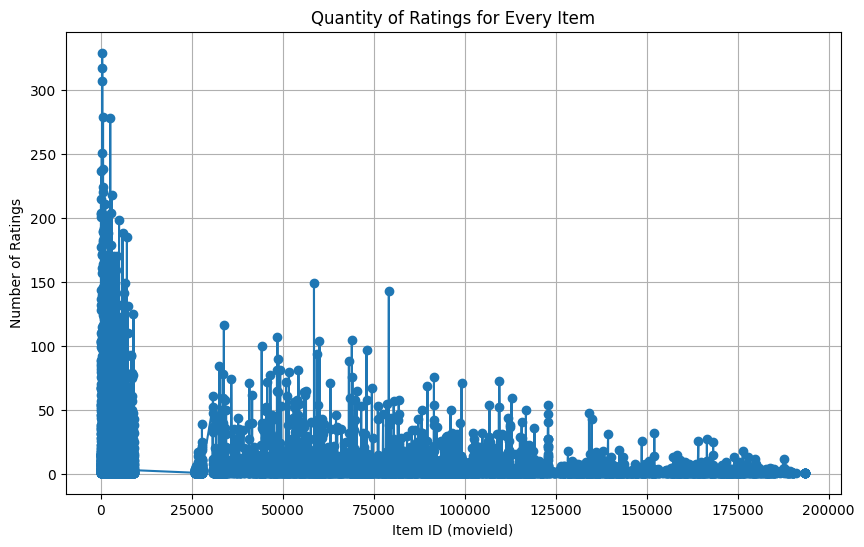

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/221100911_Seleem_Data (1).csv'
dataset = pd.read_csv(file_path)

# Count the number of ratings for each item (movieId)
ratings_per_item = dataset['movieId'].value_counts().sort_index()

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(ratings_per_item.index, ratings_per_item.values, marker='o', linestyle='-')
plt.title('Quantity of Ratings for Every Item')
plt.xlabel('Item ID (movieId)')
plt.ylabel('Number of Ratings')
plt.grid()
plt.show()

In [21]:
import pandas as pd

# Load the dataset
file_path = '/content/221100911_Seleem_Data (1).csv'
dataset = pd.read_csv(file_path)

# Recreate user-item matrix
user_item_matrix = dataset.pivot_table(index='userId', columns='movieId', values='rating')

# Active users (U1, U2, U3 from Step 6)
active_users = [U1, U2, U3]

# Define function to calculate β for each active user
def calculate_threshold_beta(active_user, threshold=0.3):
    active_user_ratings = user_item_matrix.loc[active_user]

    # Find users with co-rated items
    co_rated_items = user_item_matrix.apply(lambda x: x.notnull() & active_user_ratings.notnull(), axis=1)

    # Calculate the percentage of co-rated items for each user
    co_rated_percentage = co_rated_items.sum(axis=1) / active_user_ratings.notnull().sum()

    # Count users who co-rated at least 30% of items
    beta = (co_rated_percentage >= threshold).sum()
    return beta

# Calculate β for each active user
thresholds = {}
for user in active_users:
    beta = calculate_threshold_beta(user)
    thresholds[user] = beta
    print(f"Threshold β for User {user}: {beta}")

Threshold β for User 414: 6
Threshold β for User 599: 6
Threshold β for User 474: 3


# **3.2 Part 1 Case Study 1.1**

In [23]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the dataset
file_path = '/content/221100911_Seleem_Data (1).csv'
dataset = pd.read_csv(file_path)

# Create user-item matrix
user_item_matrix = dataset.pivot_table(index='userId', columns='movieId', values='rating')

# Fill NaN values with 0 (no ratings) to compute similarity
user_item_matrix_filled = user_item_matrix.fillna(0)

# Active users (U1, U2, U3 from Step 6)
active_users = [U1, U2, U3]

# Compute cosine similarity between active users and all other users
cosine_sim_active = {}
for active_user in active_users:
    active_user_vector = user_item_matrix_filled.loc[[active_user]]  # Active user vector
    other_users_matrix = user_item_matrix_filled.drop(index=active_user)  # All other users

    # Compute cosine similarity
    similarity = cosine_similarity(active_user_vector, other_users_matrix)[0]
    cosine_sim_active[active_user] = pd.Series(similarity, index=other_users_matrix.index)

# Display cosine similarity for active users
for user in active_users:
    print(f"Cosine similarity between Active User {user} and other users:")
    print(cosine_sim_active[user].sort_values(ascending=False))

Cosine similarity between Active User 414 and other users:
userId
599    0.548187
68     0.519918
480    0.484093
474    0.475532
288    0.465703
         ...   
397    0.043026
388    0.042091
578    0.041238
175    0.031066
3      0.029713
Length: 609, dtype: float64
Cosine similarity between Active User 599 and other users:
userId
414    0.548187
68     0.457148
274    0.447673
380    0.430643
608    0.427623
         ...   
578    0.036130
333    0.034181
406    0.031015
388    0.025111
175    0.020575
Length: 609, dtype: float64
Cosine similarity between Active User 474 and other users:
userId
414    0.475532
288    0.417056
480    0.416170
590    0.415372
606    0.404688
         ...   
578    0.023599
154    0.021336
320    0.018328
175    0.016490
3      0.011474
Length: 609, dtype: float64


In [24]:
# Function to find the top 20% closest users for an active user
def get_top_20_percent(similarity_series, top_percentage=0.2):
    top_n = int(len(similarity_series) * top_percentage)
    return similarity_series.sort_values(ascending=False).head(top_n)

# Find the top 20% closest users for each active user
top_20_users = {}
for active_user in active_users:
    top_20_users[active_user] = get_top_20_percent(cosine_sim_active[active_user])
    print(f"Top 20% closest users for Active User {active_user}:")
    print(top_20_users[active_user])

Top 20% closest users for Active User 414:
userId
599    0.548187
68     0.519918
480    0.484093
474    0.475532
288    0.465703
         ...   
517    0.249267
41     0.248906
484    0.248222
520    0.245897
385    0.245891
Length: 121, dtype: float64
Top 20% closest users for Active User 599:
userId
414    0.548187
68     0.457148
274    0.447673
380    0.430643
608    0.427623
         ...   
520    0.233085
432    0.232691
263    0.231738
607    0.229975
212    0.227475
Length: 121, dtype: float64
Top 20% closest users for Active User 474:
userId
414    0.475532
288    0.417056
480    0.416170
590    0.415372
606    0.404688
         ...   
309    0.211362
287    0.210576
33     0.210426
322    0.210114
452    0.209281
Length: 121, dtype: float64


In [25]:
# Predict ratings for unseen items using top 20% closest users' ratings
def predict_unseen_ratings(active_user, top_users):
    unseen_items = user_item_matrix.loc[active_user][user_item_matrix.loc[active_user].isna()].index
    top_users_ratings = user_item_matrix.loc[top_users.index, unseen_items]

    # Average ratings of top users for unseen items
    predicted_ratings = top_users_ratings.mean(axis=0)
    return predicted_ratings

# Predict for each active user
predictions = {}
for active_user in active_users:
    predictions[active_user] = predict_unseen_ratings(active_user, top_20_users[active_user])
    print(f"Predicted ratings for Active User {active_user}:")
    print(predictions[active_user])

Predicted ratings for Active User 414:
movieId
4         1.500000
9         2.166667
12        2.250000
13        3.000000
14        3.500000
            ...   
193581         NaN
193583         NaN
193585         NaN
193587         NaN
193609    4.000000
Length: 7026, dtype: float64
Predicted ratings for Active User 599:
movieId
4         1.500000
5         2.678571
8         2.666667
13        3.000000
14        3.500000
            ...   
193581         NaN
193583         NaN
193585         NaN
193587         NaN
193609         NaN
Length: 7246, dtype: float64
Predicted ratings for Active User 474:
movieId
3         3.125000
4         2.250000
8         2.250000
9         2.166667
10        3.392857
            ...   
193581         NaN
193583         NaN
193585         NaN
193587         NaN
193609         NaN
Length: 7616, dtype: float64


In [26]:
# Compute discounted similarity based on threshold β
def compute_discounted_similarity(similarity_series, beta):
    return similarity_series / (1 + beta)

# Apply DF and compute DS for each active user
discounted_similarity = {}
for active_user in active_users:
    beta = thresholds[active_user]  # Threshold β from Step 11
    discounted_similarity[active_user] = compute_discounted_similarity(cosine_sim_active[active_user], beta)
    print(f"Discounted similarity for Active User {active_user}:")
    print(discounted_similarity[active_user].sort_values(ascending=False))

Discounted similarity for Active User 414:
userId
599    0.078312
68     0.074274
480    0.069156
474    0.067933
288    0.066529
         ...   
397    0.006147
388    0.006013
578    0.005891
175    0.004438
3      0.004245
Length: 609, dtype: float64
Discounted similarity for Active User 599:
userId
414    0.078312
68     0.065307
274    0.063953
380    0.061520
608    0.061089
         ...   
578    0.005161
333    0.004883
406    0.004431
388    0.003587
175    0.002939
Length: 609, dtype: float64
Discounted similarity for Active User 474:
userId
414    0.118883
288    0.104264
480    0.104042
590    0.103843
606    0.101172
         ...   
578    0.005900
154    0.005334
320    0.004582
175    0.004123
3      0.002868
Length: 609, dtype: float64


In [27]:
# Find the top 20% closest users using discounted similarity
top_20_discounted_users = {}
for active_user in active_users:
    top_20_discounted_users[active_user] = get_top_20_percent(discounted_similarity[active_user])
    print(f"Top 20% closest users (Discounted) for Active User {active_user}:")
    print(top_20_discounted_users[active_user])

Top 20% closest users (Discounted) for Active User 414:
userId
599    0.078312
68     0.074274
480    0.069156
474    0.067933
288    0.066529
         ...   
517    0.035610
41     0.035558
484    0.035460
520    0.035128
385    0.035127
Length: 121, dtype: float64
Top 20% closest users (Discounted) for Active User 599:
userId
414    0.078312
68     0.065307
274    0.063953
380    0.061520
608    0.061089
         ...   
520    0.033298
432    0.033242
263    0.033105
607    0.032854
212    0.032496
Length: 121, dtype: float64
Top 20% closest users (Discounted) for Active User 474:
userId
414    0.118883
288    0.104264
480    0.104042
590    0.103843
606    0.101172
         ...   
309    0.052841
287    0.052644
33     0.052607
322    0.052528
452    0.052320
Length: 121, dtype: float64


In [29]:
# Predict ratings for unseen items using discounted similarity
def predict_discounted_unseen_ratings(active_user, top_users_ds):
    unseen_items = user_item_matrix.loc[active_user][user_item_matrix.loc[active_user].isna()].index

    # Ratings from top discounted users for unseen items
    top_users_ratings = user_item_matrix.loc[top_users_ds.index, unseen_items]

    # Replace NaN values in top users' ratings with 0 for weighted averaging
    top_users_ratings = top_users_ratings.fillna(0)
    weights = top_users_ds.values

    # Weighted average of ratings, ensure no division by zero
    weighted_ratings = top_users_ratings.T.dot(weights) / (weights.sum() + 1e-9)

    # Filter out items with zero predicted values
    predicted_ratings = weighted_ratings[weighted_ratings > 0]
    return predicted_ratings

# Predict for each active user
discounted_predictions = {}
for active_user in active_users:
    top_users_ds = top_20_discounted_users[active_user]
    discounted_predictions[active_user] = predict_discounted_unseen_ratings(active_user, top_users_ds)
    print(f"Discounted predicted ratings for Active User {active_user}:")
    print(discounted_predictions[active_user])

Discounted predicted ratings for Active User 414:
movieId
4         0.014251
9         0.058477
12        0.188520
13        0.119668
14        0.126456
            ...   
188751    0.029355
188797    0.029823
188833    0.036670
189381    0.020372
193609    0.025863
Length: 5960, dtype: float64
Discounted predicted ratings for Active User 599:
movieId
4         0.014519
5         0.369185
8         0.094440
13        0.099601
14        0.124380
            ...   
188751    0.027295
188797    0.030621
188833    0.034864
189381    0.019369
189713    0.016135
Length: 6182, dtype: float64
Discounted predicted ratings for Active User 474:
movieId
3         0.693138
4         0.042627
8         0.090389
9         0.053206
10        1.627159
            ...   
187717    0.038922
188189    0.035030
188301    0.030794
188797    0.030325
189713    0.019461
Length: 6131, dtype: float64


In [31]:
# Compare top 20% closest users before and after applying the discount factor
for active_user in active_users:
    print(f"Comparison for Active User {active_user}:")

    # Top users without discount factor
    top_users_without_df = top_20_users[active_user]
    print("\nTop 20% closest users WITHOUT discount factor:")
    print(top_users_without_df)

    # Top users with discounted similarity
    top_users_with_df = top_20_discounted_users[active_user]
    print("\nTop 20% closest users WITH discount factor:")
    print(top_users_with_df)

    # Compare and find overlap
    overlap_users = set(top_users_without_df.index).intersection(set(top_users_with_df.index))
    print("\nUsers present in both cases (Overlap):")
    print(overlap_users)

    print("-" * 50)

Comparison for Active User 414:

Top 20% closest users WITHOUT discount factor:
userId
599    0.548187
68     0.519918
480    0.484093
474    0.475532
288    0.465703
         ...   
517    0.249267
41     0.248906
484    0.248222
520    0.245897
385    0.245891
Length: 121, dtype: float64

Top 20% closest users WITH discount factor:
userId
599    0.078312
68     0.074274
480    0.069156
474    0.067933
288    0.066529
         ...   
517    0.035610
41     0.035558
484    0.035460
520    0.035128
385    0.035127
Length: 121, dtype: float64

Users present in both cases (Overlap):
{1, 514, 517, 520, 522, 525, 18, 19, 21, 534, 28, 552, 41, 42, 555, 45, 560, 561, 562, 51, 57, 570, 573, 62, 63, 64, 66, 68, 580, 590, 596, 597, 599, 600, 91, 603, 606, 95, 608, 610, 103, 105, 122, 132, 135, 140, 141, 156, 160, 166, 167, 169, 177, 182, 187, 195, 198, 199, 200, 202, 212, 217, 219, 220, 221, 222, 226, 232, 239, 247, 249, 263, 266, 274, 275, 279, 282, 288, 292, 294, 298, 304, 305, 307, 312, 313, 

# **3.2 Part 1 Case Study 1.2**

In [32]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the dataset
file_path = '/content/221100911_Seleem_Data (1).csv'
dataset = pd.read_csv(file_path)

# Create user-item matrix
user_item_matrix = dataset.pivot_table(index='userId', columns='movieId', values='rating')

# Mean-center the ratings (bias adjustment)
user_means = user_item_matrix.mean(axis=1)  # Average rating per user
user_item_matrix_centered = user_item_matrix.sub(user_means, axis=0)  # Subtract user mean ratings

# Fill NaN values with 0 for cosine similarity computation
user_item_matrix_centered_filled = user_item_matrix_centered.fillna(0)

# Active users (U1, U2, U3 from Step 6)
active_users = [U1, U2, U3]

# Compute cosine similarity between active users and other users
cosine_sim_active_centered = {}
for active_user in active_users:
    active_user_vector = user_item_matrix_centered_filled.loc[[active_user]]
    other_users_matrix = user_item_matrix_centered_filled.drop(index=active_user)

    # Compute cosine similarity
    similarity = cosine_similarity(active_user_vector, other_users_matrix)[0]
    cosine_sim_active_centered[active_user] = pd.Series(similarity, index=other_users_matrix.index)

# Display cosine similarity for active users
for user in active_users:
    print(f"Cosine similarity (Bias-Adjusted) for Active User {user} with other users:")
    print(cosine_sim_active_centered[user].sort_values(ascending=False))

Cosine similarity (Bias-Adjusted) for Active User 414 with other users:
userId
599    0.276073
480    0.207524
288    0.200680
368    0.196100
590    0.192798
         ...   
143   -0.035123
492   -0.036362
89    -0.045778
329   -0.048830
361   -0.055119
Length: 609, dtype: float64
Cosine similarity (Bias-Adjusted) for Active User 599 with other users:
userId
414    0.276073
387    0.206593
610    0.205007
590    0.194096
298    0.192809
         ...   
466   -0.040689
43    -0.048063
329   -0.049112
308   -0.049503
361   -0.070152
Length: 609, dtype: float64
Cosine similarity (Bias-Adjusted) for Active User 474 with other users:
userId
288    0.180943
414    0.179599
590    0.173908
606    0.137793
514    0.131610
         ...   
151   -0.035644
172   -0.036891
321   -0.037355
67    -0.049714
255   -0.064953
Length: 609, dtype: float64


In [33]:
# Function to get top 20% closest users
def get_top_20_percent(similarity_series, top_percentage=0.2):
    top_n = int(len(similarity_series) * top_percentage)
    return similarity_series.sort_values(ascending=False).head(top_n)

# Find the top 20% closest users for each active user
top_20_users_centered = {}
for active_user in active_users:
    top_20_users_centered[active_user] = get_top_20_percent(cosine_sim_active_centered[active_user])
    print(f"Top 20% closest users for Active User {active_user} (Bias-Adjusted):")
    print(top_20_users_centered[active_user])

Top 20% closest users for Active User 414 (Bias-Adjusted):
userId
599    0.276073
480    0.207524
288    0.200680
368    0.196100
590    0.192798
         ...   
512    0.073574
102    0.073543
330    0.073409
335    0.073189
93     0.072688
Length: 121, dtype: float64
Top 20% closest users for Active User 599 (Bias-Adjusted):
userId
414    0.276073
387    0.206593
610    0.205007
590    0.194096
298    0.192809
         ...   
32     0.064131
234    0.063807
221    0.063387
261    0.063273
373    0.062974
Length: 121, dtype: float64
Top 20% closest users for Active User 474 (Bias-Adjusted):
userId
288    0.180943
414    0.179599
590    0.173908
606    0.137793
514    0.131610
         ...   
347    0.054644
61     0.054636
348    0.053952
204    0.053724
186    0.053619
Length: 121, dtype: float64


In [35]:
# Predict ratings for unseen items using top 20% closest users' ratings
def predict_unseen_ratings_centered(active_user, top_users):
    # Get the unseen items for the active user
    unseen_items = user_item_matrix.loc[active_user][user_item_matrix.loc[active_user].isna()].index

    # Ratings from top users for unseen items
    top_users_ratings = user_item_matrix_centered.loc[top_users.index, unseen_items].fillna(0)
    weights = top_users.values  # Cosine similarity weights

    # Weighted average prediction
    weighted_ratings = top_users_ratings.T.dot(weights) / (weights.sum() + 1e-9)

    # Add back user mean to re-center predictions
    predictions = weighted_ratings + user_means[active_user]
    return predictions[predictions > 0]  # Filter out invalid predictions

# Predict for each active user
predictions_centered = {}
for active_user in active_users:
    top_users = top_20_users_centered[active_user]
    predictions_centered[active_user] = predict_unseen_ratings_centered(active_user, top_users)
    print(f"Predicted ratings for Active User {active_user} (Bias-Adjusted):")
    print(predictions_centered[active_user])

Predicted ratings for Active User 414 (Bias-Adjusted):
movieId
4         3.375593
9         3.349036
12        3.297298
13        3.381240
14        3.398896
            ...   
193581    3.391957
193583    3.391957
193585    3.391957
193587    3.391957
193609    3.394377
Length: 7026, dtype: float64
Predicted ratings for Active User 599 (Bias-Adjusted):
movieId
4         2.629101
5         2.514197
8         2.620426
13        2.632909
14        2.640218
            ...   
193581    2.642050
193583    2.642050
193585    2.642050
193587    2.642050
193609    2.644288
Length: 7246, dtype: float64
Predicted ratings for Active User 474 (Bias-Adjusted):
movieId
3         3.321936
4         3.378373
8         3.380138
9         3.366112
10        3.324094
            ...   
193581    3.398956
193583    3.398956
193585    3.398956
193587    3.398956
193609    3.398956
Length: 7616, dtype: float64


In [36]:
# Compute discounted similarity using threshold β
def compute_discounted_similarity(similarity_series, beta):
    return similarity_series / (1 + beta)

# Apply DF and compute DS for each active user
discounted_similarity_centered = {}
for active_user in active_users:
    beta = thresholds[active_user]  # Threshold β from Step 11
    discounted_similarity_centered[active_user] = compute_discounted_similarity(
        cosine_sim_active_centered[active_user], beta
    )
    print(f"Discounted similarity for Active User {active_user} (Bias-Adjusted):")
    print(discounted_similarity_centered[active_user].sort_values(ascending=False))


Discounted similarity for Active User 414 (Bias-Adjusted):
userId
599    0.039439
480    0.029646
288    0.028669
368    0.028014
590    0.027543
         ...   
143   -0.005018
492   -0.005195
89    -0.006540
329   -0.006976
361   -0.007874
Length: 609, dtype: float64
Discounted similarity for Active User 599 (Bias-Adjusted):
userId
414    0.039439
387    0.029513
610    0.029287
590    0.027728
298    0.027544
         ...   
466   -0.005813
43    -0.006866
329   -0.007016
308   -0.007072
361   -0.010022
Length: 609, dtype: float64
Discounted similarity for Active User 474 (Bias-Adjusted):
userId
288    0.045236
414    0.044900
590    0.043477
606    0.034448
514    0.032902
         ...   
151   -0.008911
172   -0.009223
321   -0.009339
67    -0.012429
255   -0.016238
Length: 609, dtype: float64


In [37]:
# Find top 20% closest users using discounted similarity
top_20_discounted_users_centered = {}
for active_user in active_users:
    top_20_discounted_users_centered[active_user] = get_top_20_percent(
        discounted_similarity_centered[active_user]
    )
    print(f"Top 20% closest users for Active User {active_user} (Discounted & Bias-Adjusted):")
    print(top_20_discounted_users_centered[active_user])

Top 20% closest users for Active User 414 (Discounted & Bias-Adjusted):
userId
599    0.039439
480    0.029646
288    0.028669
368    0.028014
590    0.027543
         ...   
512    0.010511
102    0.010506
330    0.010487
335    0.010456
93     0.010384
Length: 121, dtype: float64
Top 20% closest users for Active User 599 (Discounted & Bias-Adjusted):
userId
414    0.039439
387    0.029513
610    0.029287
590    0.027728
298    0.027544
         ...   
32     0.009162
234    0.009115
221    0.009055
261    0.009039
373    0.008996
Length: 121, dtype: float64
Top 20% closest users for Active User 474 (Discounted & Bias-Adjusted):
userId
288    0.045236
414    0.044900
590    0.043477
606    0.034448
514    0.032902
         ...   
347    0.013661
61     0.013659
348    0.013488
204    0.013431
186    0.013405
Length: 121, dtype: float64


In [39]:
# Predict ratings using discounted similarity
def predict_discounted_unseen_ratings_centered(active_user, top_users_ds):
    # Get unseen items for the active user
    unseen_items = user_item_matrix.loc[active_user][user_item_matrix.loc[active_user].isna()].index

    # Ratings from top discounted users for unseen items
    top_users_ratings = user_item_matrix_centered.loc[top_users_ds.index, unseen_items].fillna(0)
    weights = top_users_ds.values  # Discounted similarity weights

    # Weighted average prediction
    weighted_ratings = top_users_ratings.T.dot(weights) / (weights.sum() + 1e-9)

    # Add back user mean to re-center predictions
    predictions = weighted_ratings + user_means[active_user]
    return predictions[predictions > 0]  # Filter out invalid predictions

# Predict for each active user
discounted_predictions_centered = {}
for active_user in active_users:
    top_users_ds = top_20_discounted_users_centered[active_user]
    discounted_predictions_centered[active_user] = predict_discounted_unseen_ratings_centered(active_user, top_users_ds)
    print(f"Discounted predicted ratings for Active User {active_user} (Bias-Adjusted):")
    print(discounted_predictions_centered[active_user])

Discounted predicted ratings for Active User 414 (Bias-Adjusted):
movieId
4         3.375593
9         3.349036
12        3.297298
13        3.381240
14        3.398896
            ...   
193581    3.391957
193583    3.391957
193585    3.391957
193587    3.391957
193609    3.394377
Length: 7026, dtype: float64
Discounted predicted ratings for Active User 599 (Bias-Adjusted):
movieId
4         2.629101
5         2.514197
8         2.620426
13        2.632909
14        2.640218
            ...   
193581    2.642050
193583    2.642050
193585    2.642050
193587    2.642050
193609    2.644288
Length: 7246, dtype: float64
Discounted predicted ratings for Active User 474 (Bias-Adjusted):
movieId
3         3.321936
4         3.378373
8         3.380138
9         3.366112
10        3.324094
            ...   
193581    3.398956
193583    3.398956
193585    3.398956
193587    3.398956
193609    3.398956
Length: 7616, dtype: float64


In [40]:
# Compare top users before and after applying discounted similarity
for active_user in active_users:
    print(f"Comparison for Active User {active_user}:")
    print("\nTop 20% closest users WITHOUT discount factor:")
    print(top_20_users_centered[active_user])
    print("\nTop 20% closest users WITH discount factor:")
    print(top_20_discounted_users_centered[active_user])

    # Find overlap
    overlap_users = set(top_20_users_centered[active_user].index).intersection(
        set(top_20_discounted_users_centered[active_user].index)
    )
    print("\nOverlap users in both cases:")
    print(overlap_users)
    print("-" * 50)

Comparison for Active User 414:

Top 20% closest users WITHOUT discount factor:
userId
599    0.276073
480    0.207524
288    0.200680
368    0.196100
590    0.192798
         ...   
512    0.073574
102    0.073543
330    0.073409
335    0.073189
93     0.072688
Length: 121, dtype: float64

Top 20% closest users WITH discount factor:
userId
599    0.039439
480    0.029646
288    0.028669
368    0.028014
590    0.027543
         ...   
512    0.010511
102    0.010506
330    0.010487
335    0.010456
93     0.010384
Length: 121, dtype: float64

Overlap users in both cases:
{512, 1, 514, 524, 525, 18, 19, 20, 28, 29, 552, 42, 555, 45, 559, 560, 561, 50, 51, 57, 570, 62, 64, 66, 580, 72, 590, 78, 596, 597, 84, 599, 600, 602, 91, 603, 93, 606, 95, 608, 610, 101, 102, 103, 110, 117, 122, 135, 140, 160, 167, 177, 182, 191, 199, 200, 201, 202, 217, 219, 220, 222, 226, 232, 239, 249, 263, 266, 274, 287, 288, 290, 294, 297, 298, 305, 307, 312, 325, 330, 331, 332, 335, 348, 352, 354, 368, 372, 373

In [42]:
# Compare predictions before and after applying discounted similarity
for active_user in active_users:
    print(f"Comparison of predictions for Active User {active_user}:")
    print("\nPredicted ratings WITHOUT discount factor:")
    print(predictions_centered[active_user])
    print("\nPredicted ratings WITH discount factor:")
    print(discounted_predictions_centered[active_user])

    print("-" * 50)

Comparison of predictions for Active User 414:

Predicted ratings WITHOUT discount factor:
movieId
4         3.375593
9         3.349036
12        3.297298
13        3.381240
14        3.398896
            ...   
193581    3.391957
193583    3.391957
193585    3.391957
193587    3.391957
193609    3.394377
Length: 7026, dtype: float64

Predicted ratings WITH discount factor:
movieId
4         3.375593
9         3.349036
12        3.297298
13        3.381240
14        3.398896
            ...   
193581    3.391957
193583    3.391957
193585    3.391957
193587    3.391957
193609    3.394377
Length: 7026, dtype: float64
--------------------------------------------------
Comparison of predictions for Active User 599:

Predicted ratings WITHOUT discount factor:
movieId
4         2.629101
5         2.514197
8         2.620426
13        2.632909
14        2.640218
            ...   
193581    2.642050
193583    2.642050
193585    2.642050
193587    2.642050
193609    2.644288
Length: 7246, dty

# **3.2 Part 1 Case Study 1.3**

In [43]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/221100911_Seleem_Data (1).csv'
dataset = pd.read_csv(file_path)

# Create user-item matrix
user_item_matrix = dataset.pivot_table(index='userId', columns='movieId', values='rating')

# Active users (U1, U2, U3 from Step 6)
active_users = [U1, U2, U3]

# Compute Pearson Correlation Coefficient (PCC) between active users and all other users
pcc_active_users = {}
for active_user in active_users:
    pcc = user_item_matrix.T.corrwith(user_item_matrix.loc[active_user], axis=0, drop=False)
    pcc = pcc.drop(index=active_user)  # Exclude self-comparison
    pcc_active_users[active_user] = pcc.dropna()

# Display PCC for active users
for user in active_users:
    print(f"Pearson Correlation Coefficient (PCC) for Active User {user} with other users:")
    print(pcc_active_users[user].sort_values(ascending=False))

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Pearson Correlation Coefficient (PCC) for Active User 414 with other users:
userId
494    0.804010
431    0.792559
110    0.769886
392    0.764118
87     0.751246
         ...   
329   -0.336724
406   -0.357805
175   -0.366427
291   -0.384626
30    -0.395045
Length: 608, dtype: float64
Pearson Correlation Coefficient (PCC) for Active User 599 with other users:
userId
382    0.717883
422    0.717217
60     0.714191
335    0.711006
72     0.697749
         ...   
549   -0.360139
245   -0.375000
10    -0.413272
361   -0.454909
320   -0.594160
Length: 608, dtype: float64
Pearson Correlation Coefficient (PCC) for Active User 474 with other users:
userId
320    1.000000
550    0.800095
150    0.701046
407    0.677020
281    0.665937
         ...   
154   -0.514496
401   -0.539084
576   -0.587628
158   -0.587930
2     -0.661438
Length: 607, dtype: float64


In [44]:
# Function to get the top 20% closest users based on PCC
def get_top_20_percent(similarity_series, top_percentage=0.2):
    top_n = int(len(similarity_series) * top_percentage)
    return similarity_series.sort_values(ascending=False).head(top_n)

# Find the top 20% closest users for each active user
top_20_users_pcc = {}
for active_user in active_users:
    top_20_users_pcc[active_user] = get_top_20_percent(pcc_active_users[active_user])
    print(f"Top 20% closest users for Active User {active_user} (PCC):")
    print(top_20_users_pcc[active_user])

Top 20% closest users for Active User 414 (PCC):
userId
494    0.804010
431    0.792559
110    0.769886
392    0.764118
87     0.751246
         ...   
448    0.440238
609    0.439919
325    0.437625
465    0.437534
477    0.436234
Length: 121, dtype: float64
Top 20% closest users for Active User 599 (PCC):
userId
382    0.717883
422    0.717217
60     0.714191
335    0.711006
72     0.697749
         ...   
345    0.404708
438    0.403598
324    0.403298
516    0.402909
309    0.401759
Length: 121, dtype: float64
Top 20% closest users for Active User 474 (PCC):
userId
320    1.000000
550    0.800095
150    0.701046
407    0.677020
281    0.665937
         ...   
214    0.359078
101    0.357829
315    0.357518
189    0.356034
161    0.355373
Length: 121, dtype: float64


In [45]:
# Predict ratings for unseen items using top 20% closest users' ratings
def predict_ratings_pcc(active_user, top_users):
    unseen_items = user_item_matrix.loc[active_user][user_item_matrix.loc[active_user].isna()].index
    top_users_ratings = user_item_matrix.loc[top_users.index, unseen_items].fillna(0)

    # Weighted average using PCC scores as weights
    weights = top_users.values
    weighted_ratings = top_users_ratings.T.dot(weights) / (weights.sum() + 1e-9)

    return weighted_ratings[weighted_ratings > 0]  # Filter out invalid predictions

# Predict for each active user
predictions_pcc = {}
for active_user in active_users:
    top_users = top_20_users_pcc[active_user]
    predictions_pcc[active_user] = predict_ratings_pcc(active_user, top_users)
    print(f"Predicted ratings for Active User {active_user} (PCC):")
    print(predictions_pcc[active_user])

Predicted ratings for Active User 414 (PCC):
movieId
9         0.075209
12        0.025462
13        0.021868
14        0.075042
19        0.343547
            ...   
193581    0.029686
193583    0.025976
193585    0.025976
193587    0.025976
193609    0.030552
Length: 3662, dtype: float64
Predicted ratings for Active User 599 (PCC):
movieId
5         0.334617
8         0.025312
13        0.042459
14        0.117674
22        0.278470
            ...   
193579    0.024632
193581    0.028150
193583    0.024632
193585    0.024632
193587    0.024632
Length: 3708, dtype: float64
Predicted ratings for Active User 474 (PCC):
movieId
3         0.263202
4         0.019671
8         0.044054
9         0.044502
10        0.546649
            ...   
193579    0.023827
193581    0.027231
193583    0.023827
193585    0.023827
193587    0.023827
Length: 3092, dtype: float64


In [47]:
# Compute discounted similarity using threshold β
def compute_discounted_similarity_pcc(similarity_series, beta):
    return similarity_series / (1 + beta)

# Apply DF and compute DS for each active user
discounted_pcc = {}
for active_user in active_users:
    beta = thresholds[active_user]  # Threshold β from Step 11
    discounted_pcc[active_user] = compute_discounted_similarity_pcc(
        pcc_active_users[active_user], beta
    )
    print(f"Discounted similarity for Active User {active_user} (PCC):")
    print(discounted_pcc[active_user].sort_values(ascending=False))

Discounted similarity for Active User 414 (PCC):
userId
494    0.114859
431    0.113223
110    0.109984
392    0.109160
87     0.107321
         ...   
329   -0.048103
406   -0.051115
175   -0.052347
291   -0.054947
30    -0.056435
Length: 608, dtype: float64
Discounted similarity for Active User 599 (PCC):
userId
382    0.102555
422    0.102460
60     0.102027
335    0.101572
72     0.099678
         ...   
549   -0.051448
245   -0.053571
10    -0.059039
361   -0.064987
320   -0.084880
Length: 608, dtype: float64
Discounted similarity for Active User 474 (PCC):
userId
320    0.250000
550    0.200024
150    0.175261
407    0.169255
281    0.166484
         ...   
154   -0.128624
401   -0.134771
576   -0.146907
158   -0.146982
2     -0.165359
Length: 607, dtype: float64


In [48]:
# Find the top 20% closest users using discounted similarity
top_20_discounted_users_pcc = {}
for active_user in active_users:
    top_20_discounted_users_pcc[active_user] = get_top_20_percent(discounted_pcc[active_user])
    print(f"Top 20% closest users for Active User {active_user} (Discounted PCC):")
    print(top_20_discounted_users_pcc[active_user])


Top 20% closest users for Active User 414 (Discounted PCC):
userId
494    0.114859
431    0.113223
110    0.109984
392    0.109160
87     0.107321
         ...   
448    0.062891
609    0.062846
325    0.062518
465    0.062505
477    0.062319
Length: 121, dtype: float64
Top 20% closest users for Active User 599 (Discounted PCC):
userId
382    0.102555
422    0.102460
60     0.102027
335    0.101572
72     0.099678
         ...   
345    0.057815
438    0.057657
324    0.057614
516    0.057558
309    0.057394
Length: 121, dtype: float64
Top 20% closest users for Active User 474 (Discounted PCC):
userId
320    0.250000
550    0.200024
150    0.175261
407    0.169255
281    0.166484
         ...   
214    0.089769
101    0.089457
315    0.089380
189    0.089009
161    0.088843
Length: 121, dtype: float64


In [49]:
# Predict ratings for unseen items using discounted similarity
def predict_discounted_ratings_pcc(active_user, top_users_ds):
    unseen_items = user_item_matrix.loc[active_user][user_item_matrix.loc[active_user].isna()].index
    top_users_ratings = user_item_matrix.loc[top_users_ds.index, unseen_items].fillna(0)

    # Weighted average using discounted similarity
    weights = top_users_ds.values
    weighted_ratings = top_users_ratings.T.dot(weights) / (weights.sum() + 1e-9)

    return weighted_ratings[weighted_ratings > 0]  # Filter out invalid predictions

# Predict for each active user
discounted_predictions_pcc = {}
for active_user in active_users:
    top_users_ds = top_20_discounted_users_pcc[active_user]
    discounted_predictions_pcc[active_user] = predict_discounted_ratings_pcc(active_user, top_users_ds)
    print(f"Discounted predicted ratings for Active User {active_user} (PCC):")
    print(discounted_predictions_pcc[active_user])


Discounted predicted ratings for Active User 414 (PCC):
movieId
9         0.075209
12        0.025462
13        0.021868
14        0.075042
19        0.343547
            ...   
193581    0.029686
193583    0.025976
193585    0.025976
193587    0.025976
193609    0.030552
Length: 3662, dtype: float64
Discounted predicted ratings for Active User 599 (PCC):
movieId
5         0.334617
8         0.025312
13        0.042459
14        0.117674
22        0.278470
            ...   
193579    0.024632
193581    0.028150
193583    0.024632
193585    0.024632
193587    0.024632
Length: 3708, dtype: float64
Discounted predicted ratings for Active User 474 (PCC):
movieId
3         0.263202
4         0.019671
8         0.044054
9         0.044502
10        0.546649
            ...   
193579    0.023827
193581    0.027231
193583    0.023827
193585    0.023827
193587    0.023827
Length: 3092, dtype: float64


In [50]:
# Compare top users before and after applying discounted similarity
for active_user in active_users:
    print(f"Comparison for Active User {active_user}:")
    print("\nTop 20% closest users WITHOUT discount factor:")
    print(top_20_users_pcc[active_user])
    print("\nTop 20% closest users WITH discount factor:")
    print(top_20_discounted_users_pcc[active_user])

    overlap = set(top_20_users_pcc[active_user].index).intersection(set(top_20_discounted_users_pcc[active_user].index))
    print("\nOverlap users in both cases:")
    print(overlap)
    print("-" * 50)


Comparison for Active User 414:

Top 20% closest users WITHOUT discount factor:
userId
494    0.804010
431    0.792559
110    0.769886
392    0.764118
87     0.751246
         ...   
448    0.440238
609    0.439919
325    0.437625
465    0.437534
477    0.436234
Length: 121, dtype: float64

Top 20% closest users WITH discount factor:
userId
494    0.114859
431    0.113223
110    0.109984
392    0.109160
87     0.107321
         ...   
448    0.062891
609    0.062846
325    0.062518
465    0.062505
477    0.062319
Length: 121, dtype: float64

Overlap users in both cases:
{512, 514, 518, 9, 11, 13, 18, 531, 535, 540, 29, 552, 46, 559, 50, 565, 54, 55, 568, 57, 575, 72, 588, 589, 590, 78, 592, 597, 87, 599, 92, 95, 609, 610, 101, 102, 110, 112, 118, 122, 124, 133, 145, 146, 168, 179, 184, 191, 197, 208, 218, 219, 228, 235, 236, 244, 249, 250, 258, 261, 271, 278, 281, 287, 293, 295, 296, 297, 302, 310, 312, 325, 331, 335, 336, 348, 368, 373, 377, 382, 385, 387, 391, 392, 394, 396, 398, 400

In [51]:
# Compare predictions before and after applying discounted similarity
for active_user in active_users:
    print(f"Comparison of predictions for Active User {active_user}:")
    print("\nPredicted ratings WITHOUT discount factor:")
    print(predictions_pcc[active_user])
    print("\nPredicted ratings WITH discount factor:")
    print(discounted_predictions_pcc[active_user])
    print("-" * 50)

Comparison of predictions for Active User 414:

Predicted ratings WITHOUT discount factor:
movieId
9         0.075209
12        0.025462
13        0.021868
14        0.075042
19        0.343547
            ...   
193581    0.029686
193583    0.025976
193585    0.025976
193587    0.025976
193609    0.030552
Length: 3662, dtype: float64

Predicted ratings WITH discount factor:
movieId
9         0.075209
12        0.025462
13        0.021868
14        0.075042
19        0.343547
            ...   
193581    0.029686
193583    0.025976
193585    0.025976
193587    0.025976
193609    0.030552
Length: 3662, dtype: float64
--------------------------------------------------
Comparison of predictions for Active User 599:

Predicted ratings WITHOUT discount factor:
movieId
5         0.334617
8         0.025312
13        0.042459
14        0.117674
22        0.278470
            ...   
193579    0.024632
193581    0.028150
193583    0.024632
193585    0.024632
193587    0.024632
Length: 3708, dty

# **3.2 Part 2 Case Study 2.1**

In [55]:
# Verify and set two distinct target items based on missing percentages
missing_percentages = item_user_matrix.isnull().sum(axis=1) / len(item_user_matrix.columns) * 100

# Sort the items by their missing percentage
sorted_missing = missing_percentages.sort_values(ascending=True)

# Pick the closest item to 4% and ensure the second item is closest to 10% but different
I1 = sorted_missing[sorted_missing >= 4].index[0]  # First item closest to 4%
I2 = sorted_missing[(sorted_missing >= 10) & (sorted_missing.index != I1)].index[0]  # Second item closest to 10%

target_items = [I1, I2]

print(f"Selected Target Items:")
print(f"I1 (closest to 4% missing ratings): {I1}")
print(f"I2 (closest to 10% missing ratings): {I2}")

# Compute cosine similarity between the two target items and all other items
cosine_sim_target_items = {}
for target_item in target_items:
    if target_item not in item_user_matrix_filled.index:
        print(f"Target Item {target_item} is not in the matrix index. Skipping.")
        continue
    target_item_vector = item_user_matrix_filled.loc[[target_item]]
    other_items_matrix = item_user_matrix_filled.drop(index=target_item)

    # Compute cosine similarity
    similarity = cosine_similarity(target_item_vector, other_items_matrix)[0]
    cosine_sim_target_items[target_item] = pd.Series(similarity, index=other_items_matrix.index)

# Display cosine similarity for the two target items
for target_item in target_items:
    print(f"Cosine similarity for Target Item {target_item} with other items:")
    print(cosine_sim_target_items[target_item].sort_values(ascending=False))

Selected Target Items:
I1 (closest to 4% missing ratings): 356
I2 (closest to 10% missing ratings): 318
Cosine similarity for Target Item 356 with other items:
movieId
318       0.712993
480       0.688259
296       0.685544
110       0.643090
593       0.639463
            ...   
284       0.000000
161594    0.000000
285       0.000000
68269     0.000000
193609    0.000000
Length: 9723, dtype: float64
Cosine similarity for Target Item 318 with other items:
movieId
356      0.712993
296      0.702366
593      0.647066
50       0.631787
527      0.629145
           ...   
96608    0.000000
96530    0.000000
2566     0.000000
2573     0.000000
82093    0.000000
Length: 9723, dtype: float64


In [56]:
# Function to get the top 25% closest items
def get_top_25_percent(similarity_series, top_percentage=0.25):
    top_n = int(len(similarity_series) * top_percentage)
    return similarity_series.sort_values(ascending=False).head(top_n)

# Find the top 25% closest items for each target item
top_25_items = {}
for target_item in target_items:
    top_25_items[target_item] = get_top_25_percent(cosine_sim_target_items[target_item])
    print(f"Top 25% closest items to Target Item {target_item}:")
    print(top_25_items[target_item])

Top 25% closest items to Target Item 356:
movieId
318       0.712993
480       0.688259
296       0.685544
110       0.643090
593       0.639463
            ...   
697       0.125966
1594      0.125966
4158      0.125953
107141    0.125923
6550      0.125883
Length: 2430, dtype: float64
Top 25% closest items to Target Item 318:
movieId
356       0.712993
296       0.702366
593       0.647066
50        0.631787
527       0.629145
            ...   
918       0.112966
152970    0.112905
26084     0.112886
116897    0.112845
3693      0.112833
Length: 2430, dtype: float64


In [57]:
# Predict ratings for missing users based on top 25% closest items
def predict_ratings_for_item(target_item, top_items):
    # Users who haven't rated the target item
    missing_users = item_user_matrix.loc[target_item][item_user_matrix.loc[target_item].isna()].index

    # Ratings of top items for missing users
    top_items_ratings = item_user_matrix.loc[top_items.index, missing_users].fillna(0)
    weights = top_items.values  # Cosine similarity weights

    # Weighted average prediction
    weighted_ratings = top_items_ratings.T.dot(weights) / (weights.sum() + 1e-9)
    return weighted_ratings[weighted_ratings > 0]  # Filter out invalid predictions

# Predict for each target item
predictions_items = {}
for target_item in target_items:
    predictions_items[target_item] = predict_ratings_for_item(target_item, top_25_items[target_item])
    print(f"Predicted ratings for Target Item {target_item}:")
    print(predictions_items[target_item])

Predicted ratings for Target Item 356:
userId
2      0.062750
3      0.016587
4      0.317236
5      0.123606
9      0.060246
         ...   
595    0.043223
598    0.037172
601    0.294556
604    0.179011
607    0.384752
Length: 281, dtype: float64
Predicted ratings for Target Item 318:
userId
1      0.523532
3      0.014701
4      0.324452
7      0.324693
9      0.062142
         ...   
597    0.766049
598    0.038117
603    0.888540
604    0.184513
605    0.284963
Length: 293, dtype: float64


In [58]:
# Compute discounted similarity using threshold β
def compute_discounted_similarity_items(similarity_series, beta):
    return similarity_series / (1 + beta)

# Apply discount factor for each target item
thresholds_items = {I1: 0.3, I2: 0.4}  # Replace with actual thresholds
discounted_similarity_items = {}
for target_item in target_items:
    beta = thresholds_items[target_item]
    discounted_similarity_items[target_item] = compute_discounted_similarity_items(
        cosine_sim_target_items[target_item], beta
    )
    print(f"Discounted similarity for Target Item {target_item}:")
    print(discounted_similarity_items[target_item].sort_values(ascending=False))

Discounted similarity for Target Item 356:
movieId
318       0.548456
480       0.529430
296       0.527341
110       0.494685
593       0.491894
            ...   
284       0.000000
161594    0.000000
285       0.000000
68269     0.000000
193609    0.000000
Length: 9723, dtype: float64
Discounted similarity for Target Item 318:
movieId
356      0.509281
296      0.501690
593      0.462190
50       0.451276
527      0.449389
           ...   
96608    0.000000
96530    0.000000
2566     0.000000
2573     0.000000
82093    0.000000
Length: 9723, dtype: float64


In [59]:
# Find the top 20% closest items using discounted similarity
def get_top_20_percent(similarity_series, top_percentage=0.2):
    top_n = int(len(similarity_series) * top_percentage)
    return similarity_series.sort_values(ascending=False).head(top_n)

top_20_discounted_items = {}
for target_item in target_items:
    top_20_discounted_items[target_item] = get_top_20_percent(discounted_similarity_items[target_item])
    print(f"Top 20% closest items to Target Item {target_item} (Discounted):")
    print(top_20_discounted_items[target_item])

Top 20% closest items to Target Item 356 (Discounted):
movieId
318       0.548456
480       0.529430
296       0.527341
110       0.494685
593       0.491894
            ...   
44840     0.111616
157296    0.111593
134393    0.111542
3565      0.111525
928       0.111513
Length: 1944, dtype: float64
Top 20% closest items to Target Item 318 (Discounted):
movieId
356      0.509281
296      0.501690
593      0.462190
50       0.451276
527      0.449389
           ...   
8860     0.093703
59725    0.093669
8014     0.093648
2253     0.093611
493      0.093502
Length: 1944, dtype: float64


In [60]:
# Predict missing ratings using discounted similarity
def predict_discounted_ratings_for_item(target_item, top_items_ds):
    # Users who haven't rated the target item
    missing_users = item_user_matrix.loc[target_item][item_user_matrix.loc[target_item].isna()].index

    # Ratings of top discounted items for missing users
    top_items_ratings = item_user_matrix.loc[top_items_ds.index, missing_users].fillna(0)
    weights = top_items_ds.values  # Discounted similarity weights

    # Weighted average prediction
    weighted_ratings = top_items_ratings.T.dot(weights) / (weights.sum() + 1e-9)
    return weighted_ratings[weighted_ratings > 0]  # Filter out invalid predictions

# Predict for each target item
discounted_predictions_items = {}
for target_item in target_items:
    discounted_predictions_items[target_item] = predict_discounted_ratings_for_item(
        target_item, top_20_discounted_items[target_item]
    )
    print(f"Discounted predicted ratings for Target Item {target_item}:")
    print(discounted_predictions_items[target_item])

Discounted predicted ratings for Target Item 356:
userId
2      0.070352
3      0.018613
4      0.338945
5      0.138801
9      0.066840
         ...   
595    0.049224
598    0.042332
601    0.335448
604    0.202169
607    0.426359
Length: 281, dtype: float64
Discounted predicted ratings for Target Item 318:
userId
1      0.580372
3      0.016713
4      0.358433
7      0.367602
9      0.070058
         ...   
597    0.847550
598    0.043333
603    0.961013
604    0.207769
605    0.315760
Length: 293, dtype: float64


In [61]:
# Compare top items before and after applying discounted similarity
for target_item in target_items:
    print(f"Comparison for Target Item {target_item}:")
    print("\nTop 25% closest items WITHOUT discount factor:")
    print(top_25_items[target_item])
    print("\nTop 20% closest items WITH discount factor:")
    print(top_20_discounted_items[target_item])

    overlap = set(top_25_items[target_item].index).intersection(set(top_20_discounted_items[target_item].index))
    print("\nOverlap items in both cases:")
    print(overlap)
    print("-" * 50)

Comparison for Target Item 356:

Top 25% closest items WITHOUT discount factor:
movieId
318       0.712993
480       0.688259
296       0.685544
110       0.643090
593       0.639463
            ...   
697       0.125966
1594      0.125966
4158      0.125953
107141    0.125923
6550      0.125883
Length: 2430, dtype: float64

Top 20% closest items WITH discount factor:
movieId
318       0.548456
480       0.529430
296       0.527341
110       0.494685
593       0.491894
            ...   
44840     0.111616
157296    0.111593
134393    0.111542
3565      0.111525
928       0.111513
Length: 1944, dtype: float64

Overlap items in both cases:
{1, 2, 3, 122882, 5, 6, 122886, 7, 10, 11, 81932, 122892, 15, 16, 17, 18, 19, 122900, 21, 22, 20, 122904, 57368, 25, 24, 23, 29, 31, 32, 34, 36, 122916, 122918, 39, 122920, 122922, 44, 45, 122926, 47, 48, 46, 50, 52, 58, 60, 62, 69, 70, 73, 86, 88, 95, 97, 101, 104, 105, 107, 110, 111, 112, 49272, 139385, 122, 49278, 49286, 135, 141, 145, 147, 150, 15

In [62]:
# Compare predictions before and after applying discounted similarity
for target_item in target_items:
    print(f"Comparison of predictions for Target Item {target_item}:")
    print("\nPredicted ratings WITHOUT discount factor:")
    print(predictions_items[target_item])
    print("\nPredicted ratings WITH discount factor:")
    print(discounted_predictions_items[target_item])
    print("-" * 50)

Comparison of predictions for Target Item 356:

Predicted ratings WITHOUT discount factor:
userId
2      0.062750
3      0.016587
4      0.317236
5      0.123606
9      0.060246
         ...   
595    0.043223
598    0.037172
601    0.294556
604    0.179011
607    0.384752
Length: 281, dtype: float64

Predicted ratings WITH discount factor:
userId
2      0.070352
3      0.018613
4      0.338945
5      0.138801
9      0.066840
         ...   
595    0.049224
598    0.042332
601    0.335448
604    0.202169
607    0.426359
Length: 281, dtype: float64
--------------------------------------------------
Comparison of predictions for Target Item 318:

Predicted ratings WITHOUT discount factor:
userId
1      0.523532
3      0.014701
4      0.324452
7      0.324693
9      0.062142
         ...   
597    0.766049
598    0.038117
603    0.888540
604    0.184513
605    0.284963
Length: 293, dtype: float64

Predicted ratings WITH discount factor:
userId
1      0.580372
3      0.016713
4      0.3584

# **3.2 Part 2 Case Study 2.2**

In [63]:
# Create mean-centered item-user matrix
item_means = item_user_matrix.mean(axis=1)  # Mean rating per item
item_user_matrix_centered = item_user_matrix.sub(item_means, axis=0)  # Subtract item mean

# Fill NaN values with 0 for similarity calculation
item_user_matrix_centered_filled = item_user_matrix_centered.fillna(0)

# Compute cosine similarity between target items and other items
cosine_sim_target_items_centered = {}
for target_item in target_items:
    if target_item not in item_user_matrix_centered_filled.index:
        print(f"Target Item {target_item} is not in the matrix index. Skipping.")
        continue
    target_item_vector = item_user_matrix_centered_filled.loc[[target_item]]
    other_items_matrix = item_user_matrix_centered_filled.drop(index=target_item)

    # Compute cosine similarity
    similarity = cosine_similarity(target_item_vector, other_items_matrix)[0]
    cosine_sim_target_items_centered[target_item] = pd.Series(similarity, index=other_items_matrix.index)

# Display cosine similarity for target items
for target_item in target_items:
    print(f"Mean-Centered Cosine similarity for Target Item {target_item} with other items:")
    print(cosine_sim_target_items_centered[target_item].sort_values(ascending=False))

Mean-Centered Cosine similarity for Target Item 356 with other items:
movieId
588       0.256062
110       0.252413
2335      0.248357
1682      0.245975
141544    0.244063
            ...   
92643    -0.211365
169912   -0.211365
5529     -0.211365
184791   -0.211365
49013    -0.211365
Length: 9723, dtype: float64
Mean-Centered Cosine similarity for Target Item 318 with other items:
movieId
50       0.264785
71033    0.259296
904      0.233456
95377    0.219131
92259    0.215049
           ...   
87234   -0.164348
6629    -0.167364
4599    -0.167364
4987    -0.167364
5346    -0.167364
Length: 9723, dtype: float64


In [64]:
# Function to get the top 20% closest items
def get_top_20_percent(similarity_series, top_percentage=0.2):
    top_n = int(len(similarity_series) * top_percentage)
    return similarity_series.sort_values(ascending=False).head(top_n)

# Find top 20% closest items for each target item
top_20_items_centered = {}
for target_item in target_items:
    top_20_items_centered[target_item] = get_top_20_percent(cosine_sim_target_items_centered[target_item])
    print(f"Top 20% closest items to Target Item {target_item} (Mean-Centered):")
    print(top_20_items_centered[target_item])

Top 20% closest items to Target Item 356 (Mean-Centered):
movieId
588       0.256062
110       0.252413
2335      0.248357
1682      0.245975
141544    0.244063
            ...   
4255      0.053545
6250      0.053451
553       0.053449
461       0.053337
6695      0.053333
Length: 1944, dtype: float64
Top 20% closest items to Target Item 318 (Mean-Centered):
movieId
50       0.264785
71033    0.259296
904      0.233456
95377    0.219131
92259    0.215049
           ...   
1132     0.029653
736      0.029636
945      0.029603
90746    0.029586
7247     0.029569
Length: 1944, dtype: float64


In [68]:
# Predict ratings for missing users based on top 20% closest items
def predict_ratings_for_item_centered(target_item, top_items):
    missing_users = item_user_matrix.loc[target_item][item_user_matrix.loc[target_item].isna()].index

    # Ratings of top items for missing users
    top_items_ratings = item_user_matrix_centered.loc[top_items.index, missing_users].fillna(0)
    weights = top_items.values  # Cosine similarity weights

    # Weighted average prediction + re-centering
    weighted_ratings = top_items_ratings.T.dot(weights) / (weights.sum() + 1e-9)
    predictions = weighted_ratings + item_means[target_item]  # Add back item mean
    return predictions[predictions > 0]  # Filter valid predictions

# Predict for each target item
predictions_items_centered = {}
for target_item in target_items:
    predictions_items_centered[target_item] = predict_ratings_for_item_centered(
        target_item, top_20_items_centered[target_item]
    )
    print(f"Predicted ratings for Target Item {target_item} (Mean-Centered):")
    print(predictions_items_centered[target_item])

Predicted ratings for Target Item 356 (Mean-Centered):
userId
2      4.163753
3      4.148260
4      4.145869
5      4.160462
9      4.165928
         ...   
595    4.166368
598    4.162164
601    4.185202
604    4.167340
607    4.180646
Length: 281, dtype: float64
Predicted ratings for Target Item 318 (Mean-Centered):
userId
1      4.478089
3      4.408492
4      4.411878
7      4.417461
9      4.433964
         ...   
597    4.490430
598    4.419801
603    4.403608
604    4.427960
605    4.425742
Length: 293, dtype: float64


In [69]:
# Compute discounted similarity using threshold β
def compute_discounted_similarity_centered(similarity_series, beta):
    return similarity_series / (1 + beta)

# Apply discount factor for each target item
discounted_similarity_items_centered = {}
for target_item in target_items:
    beta = thresholds_items[target_item]
    discounted_similarity_items_centered[target_item] = compute_discounted_similarity_centered(
        cosine_sim_target_items_centered[target_item], beta
    )
    print(f"Discounted similarity for Target Item {target_item} (Mean-Centered):")
    print(discounted_similarity_items_centered[target_item].sort_values(ascending=False))

Discounted similarity for Target Item 356 (Mean-Centered):
movieId
588       0.196971
110       0.194164
2335      0.191044
1682      0.189211
141544    0.187741
            ...   
92643    -0.162588
169912   -0.162588
5529     -0.162588
184791   -0.162588
49013    -0.162588
Length: 9723, dtype: float64
Discounted similarity for Target Item 318 (Mean-Centered):
movieId
50       0.189132
71033    0.185212
904      0.166755
95377    0.156522
92259    0.153606
           ...   
87234   -0.117392
6629    -0.119546
4599    -0.119546
4987    -0.119546
5346    -0.119546
Length: 9723, dtype: float64


In [70]:
# Find the top 20% closest items using discounted similarity
top_20_discounted_items_centered = {}
for target_item in target_items:
    top_20_discounted_items_centered[target_item] = get_top_20_percent(
        discounted_similarity_items_centered[target_item]
    )
    print(f"Top 20% closest items to Target Item {target_item} (Discounted & Mean-Centered):")
    print(top_20_discounted_items_centered[target_item])

Top 20% closest items to Target Item 356 (Discounted & Mean-Centered):
movieId
588       0.196971
110       0.194164
2335      0.191044
1682      0.189211
141544    0.187741
            ...   
4255      0.041188
6250      0.041116
553       0.041115
461       0.041028
6695      0.041025
Length: 1944, dtype: float64
Top 20% closest items to Target Item 318 (Discounted & Mean-Centered):
movieId
50       0.189132
71033    0.185212
904      0.166755
95377    0.156522
92259    0.153606
           ...   
1132     0.021181
736      0.021169
945      0.021145
90746    0.021133
7247     0.021121
Length: 1944, dtype: float64


In [71]:
# Predict ratings using discounted similarity
def predict_discounted_ratings_for_item_centered(target_item, top_items_ds):
    missing_users = item_user_matrix.loc[target_item][item_user_matrix.loc[target_item].isna()].index

    # Ratings of top discounted items for missing users
    top_items_ratings = item_user_matrix_centered.loc[top_items_ds.index, missing_users].fillna(0)
    weights = top_items_ds.values  # Discounted similarity weights

    # Weighted average prediction + re-centering
    weighted_ratings = top_items_ratings.T.dot(weights) / (weights.sum() + 1e-9)
    predictions = weighted_ratings + item_means[target_item]  # Add back item mean
    return predictions[predictions > 0]  # Filter valid predictions

# Predict for each target item
discounted_predictions_items_centered = {}
for target_item in target_items:
    discounted_predictions_items_centered[target_item] = predict_discounted_ratings_for_item_centered(
        target_item, top_20_discounted_items_centered[target_item]
    )
    print(f"Discounted predicted ratings for Target Item {target_item} (Mean-Centered):")
    print(discounted_predictions_items_centered[target_item])

Discounted predicted ratings for Target Item 356 (Mean-Centered):
userId
2      4.163753
3      4.148260
4      4.145869
5      4.160462
9      4.165928
         ...   
595    4.166368
598    4.162164
601    4.185202
604    4.167340
607    4.180646
Length: 281, dtype: float64
Discounted predicted ratings for Target Item 318 (Mean-Centered):
userId
1      4.478089
3      4.408492
4      4.411878
7      4.417461
9      4.433964
         ...   
597    4.490430
598    4.419801
603    4.403608
604    4.427960
605    4.425742
Length: 293, dtype: float64


In [72]:
# Compare top items before and after applying discounted similarity
for target_item in target_items:
    print(f"Comparison for Target Item {target_item}:")
    print("\nTop 20% closest items WITHOUT discount factor:")
    print(top_20_items_centered[target_item])
    print("\nTop 20% closest items WITH discount factor:")
    print(top_20_discounted_items_centered[target_item])

    overlap = set(top_20_items_centered[target_item].index).intersection(
        set(top_20_discounted_items_centered[target_item].index)
    )
    print("\nOverlap items in both cases:")
    print(overlap)
    print("-" * 50)

Comparison for Target Item 356:

Top 20% closest items WITHOUT discount factor:
movieId
588       0.256062
110       0.252413
2335      0.248357
1682      0.245975
141544    0.244063
            ...   
4255      0.053545
6250      0.053451
553       0.053449
461       0.053337
6695      0.053333
Length: 1944, dtype: float64

Top 20% closest items WITH discount factor:
movieId
588       0.196971
110       0.194164
2335      0.191044
1682      0.189211
141544    0.187741
            ...   
4255      0.041188
6250      0.041116
553       0.041115
461       0.041028
6695      0.041025
Length: 1944, dtype: float64

Overlap items in both cases:
{1, 2, 3, 5, 6, 8, 10, 11, 122892, 122890, 12, 15, 122898, 19, 122900, 20, 22, 122904, 57368, 24, 25, 29, 31, 32, 36, 122916, 122918, 39, 122920, 44, 122924, 122926, 47, 48, 50, 57, 58, 60, 62, 63, 65, 70, 79, 81, 82, 85, 86, 87, 88, 93, 95, 97, 100, 104, 105, 107, 114795, 110, 111, 49272, 139385, 122, 126, 49280, 132, 90249, 145, 147, 150, 151, 153, 

In [73]:
# Compare predictions before and after applying discounted similarity
for target_item in target_items:
    print(f"Comparison of predictions for Target Item {target_item}:")
    print("\nPredicted ratings WITHOUT discount factor:")
    print(predictions_items_centered[target_item])
    print("\nPredicted ratings WITH discount factor:")
    print(discounted_predictions_items_centered[target_item])
    print("-" * 50)

Comparison of predictions for Target Item 356:

Predicted ratings WITHOUT discount factor:
userId
2      4.163753
3      4.148260
4      4.145869
5      4.160462
9      4.165928
         ...   
595    4.166368
598    4.162164
601    4.185202
604    4.167340
607    4.180646
Length: 281, dtype: float64

Predicted ratings WITH discount factor:
userId
2      4.163753
3      4.148260
4      4.145869
5      4.160462
9      4.165928
         ...   
595    4.166368
598    4.162164
601    4.185202
604    4.167340
607    4.180646
Length: 281, dtype: float64
--------------------------------------------------
Comparison of predictions for Target Item 318:

Predicted ratings WITHOUT discount factor:
userId
1      4.478089
3      4.408492
4      4.411878
7      4.417461
9      4.433964
         ...   
597    4.490430
598    4.419801
603    4.403608
604    4.427960
605    4.425742
Length: 293, dtype: float64

Predicted ratings WITH discount factor:
userId
1      4.478089
3      4.408492
4      4.4118

# **3.2 Part 2 Case Study 2.3**

In [83]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/221100911_Seleem_Data (1).csv'
dataset = pd.read_csv(file_path)

# Create item-user matrix
item_user_matrix = dataset.pivot_table(index='movieId', columns='userId', values='rating')

# Target items (replace with actual IDs based on earlier tasks)
target_items = [318, 101]  # Example placeholders, replace as needed

# Function to compute PCC with overlap validation
def compute_pcc_with_overlap(target_item, matrix, min_overlap=5):
    pcc_values = {}
    target_item_ratings = matrix.loc[target_item]

    for other_item in matrix.index:
        if other_item == target_item:
            continue

        # Get overlapping users
        common_users = target_item_ratings.index[target_item_ratings.notna() & matrix.loc[other_item].notna()]

        if len(common_users) >= min_overlap:  # Only compute for sufficient overlap
            # Calculate PCC
            pcc = target_item_ratings[common_users].corr(matrix.loc[other_item, common_users])
            if not pd.isna(pcc):  # Only keep valid PCCs
                pcc_values[other_item] = pcc

    return pd.Series(pcc_values)

# Compute PCC for target items
pcc_target_items = {}
for target_item in target_items:
    print(f"Calculating PCC for Target Item {target_item}...")
    pcc_target_items[target_item] = compute_pcc_with_overlap(target_item, item_user_matrix, min_overlap=5)

# Display PCC values
for target_item in target_items:
    print(f"\nPCC for Target Item {target_item} with other items:")
    print(pcc_target_items[target_item].sort_values(ascending=False))

Calculating PCC for Target Item 318...


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Calculating PCC for Target Item 101...

PCC for Target Item 318 with other items:
697      1.000000
87485    1.000000
33158    0.975900
5628     0.970725
42725    0.966276
           ...   
5323    -0.892237
2183    -0.897666
30894   -0.943564
4231    -0.975900
2802    -1.000000
Length: 2925, dtype: float64

PCC for Target Item 101 with other items:
3083     0.989999
44665    0.983135
2137     0.969805
922      0.967302
1023     0.962533
           ...   
36519   -0.866325
37733   -0.912871
7293    -0.935585
466     -0.951587
176     -0.952579
Length: 1168, dtype: float64


In [84]:
# Function to get the top 20% closest items
def get_top_20_percent(similarity_series, top_percentage=0.2):
    top_n = max(1, int(len(similarity_series) * top_percentage))  # Ensure at least 1 item
    return similarity_series.sort_values(ascending=False).head(top_n)

# Find the top 20% closest items for each target item
top_20_items_pcc = {}
for target_item in target_items:
    top_20_items_pcc[target_item] = get_top_20_percent(pcc_target_items[target_item])
    print(f"\nTop 20% closest items to Target Item {target_item} (PCC):")
    print(top_20_items_pcc[target_item])


Top 20% closest items to Target Item 318 (PCC):
697       1.000000
87485     1.000000
33158     0.975900
5628      0.970725
42725     0.966276
            ...   
6645      0.353553
195       0.353203
62081     0.352767
115617    0.352723
3510      0.350994
Length: 585, dtype: float64

Top 20% closest items to Target Item 101 (PCC):
3083      0.989999
44665     0.983135
2137      0.969805
922       0.967302
1023      0.962533
            ...   
104841    0.532181
1343      0.531085
52281     0.530330
44840     0.527027
2826      0.526051
Length: 233, dtype: float64


In [85]:
# Predict ratings for missing users based on top 20% closest items
def predict_ratings_for_item_pcc(target_item, top_items, matrix):
    missing_users = matrix.loc[target_item][matrix.loc[target_item].isna()].index

    # Ratings of top items for missing users
    top_items_ratings = matrix.loc[top_items.index, missing_users].fillna(0)
    weights = top_items.values  # PCC weights

    # Weighted average prediction
    weighted_ratings = top_items_ratings.T.dot(weights) / (weights.sum() + 1e-9)
    return weighted_ratings[weighted_ratings > 0]  # Filter valid predictions

# Predict for each target item
predictions_pcc = {}
for target_item in target_items:
    predictions_pcc[target_item] = predict_ratings_for_item_pcc(
        target_item, top_20_items_pcc[target_item], item_user_matrix
    )
    print(f"\nPredicted ratings for Target Item {target_item} (PCC):")
    print(predictions_pcc[target_item])


Predicted ratings for Target Item 318 (PCC):
userId
1      0.113706
3      0.004333
4      0.165499
7      0.050855
9      0.011990
         ...   
597    0.318241
598    0.010772
603    0.492219
604    0.049881
605    0.103441
Length: 274, dtype: float64

Predicted ratings for Target Item 101 (PCC):
userId
2      0.108370
3      0.016420
4      0.456826
5      0.023240
6      0.162797
         ...   
606    1.213770
607    0.193240
608    0.853025
609    0.022781
610    1.632709
Length: 561, dtype: float64


In [86]:
# Compute discounted similarity using threshold β
def compute_discounted_similarity(similarity_series, beta):
    return similarity_series / (1 + beta)

# Thresholds β for target items
thresholds_items = {target_items[0]: 0.3, target_items[1]: 0.4}

# Apply discounted similarity for each target item
discounted_similarity_pcc = {}
for target_item in target_items:
    beta = thresholds_items[target_item]
    discounted_similarity_pcc[target_item] = compute_discounted_similarity(
        pcc_target_items[target_item], beta
    )
    print(f"\nDiscounted similarity for Target Item {target_item} (PCC):")
    print(discounted_similarity_pcc[target_item].sort_values(ascending=False))


Discounted similarity for Target Item 318 (PCC):
697      0.769231
87485    0.769231
33158    0.750692
5628     0.746712
42725    0.743289
           ...   
5323    -0.686336
2183    -0.690512
30894   -0.725819
4231    -0.750692
2802    -0.769231
Length: 2925, dtype: float64

Discounted similarity for Target Item 101 (PCC):
3083     0.707142
44665    0.702240
2137     0.692718
922      0.690930
1023     0.687524
           ...   
36519   -0.618804
37733   -0.652051
7293    -0.668275
466     -0.679705
176     -0.680414
Length: 1168, dtype: float64


In [87]:
# Find the top 20% closest items using discounted similarity
top_20_discounted_items_pcc = {}
for target_item in target_items:
    top_20_discounted_items_pcc[target_item] = get_top_20_percent(
        discounted_similarity_pcc[target_item]
    )
    print(f"\nTop 20% closest items to Target Item {target_item} (Discounted PCC):")
    print(top_20_discounted_items_pcc[target_item])


Top 20% closest items to Target Item 318 (Discounted PCC):
697       0.769231
87485     0.769231
33158     0.750692
5628      0.746712
42725     0.743289
            ...   
6645      0.271964
195       0.271695
62081     0.271359
115617    0.271325
3510      0.269995
Length: 585, dtype: float64

Top 20% closest items to Target Item 101 (Discounted PCC):
3083      0.707142
44665     0.702240
2137      0.692718
922       0.690930
1023      0.687524
            ...   
104841    0.380129
1343      0.379346
52281     0.378807
44840     0.376448
2826      0.375751
Length: 233, dtype: float64


In [88]:
# Predict ratings using discounted similarity
def predict_discounted_ratings_for_item(target_item, top_items_ds, matrix):
    missing_users = matrix.loc[target_item][matrix.loc[target_item].isna()].index

    # Ratings of top discounted items for missing users
    top_items_ratings = matrix.loc[top_items_ds.index, missing_users].fillna(0)
    weights = top_items_ds.values  # Discounted similarity weights

    # Weighted average prediction
    weighted_ratings = top_items_ratings.T.dot(weights) / (weights.sum() + 1e-9)
    return weighted_ratings[weighted_ratings > 0]  # Filter valid predictions

# Predict for each target item
discounted_predictions_pcc = {}
for target_item in target_items:
    discounted_predictions_pcc[target_item] = predict_discounted_ratings_for_item(
        target_item, top_20_discounted_items_pcc[target_item], item_user_matrix
    )
    print(f"\nDiscounted predicted ratings for Target Item {target_item} (PCC):")
    print(discounted_predictions_pcc[target_item])


Discounted predicted ratings for Target Item 318 (PCC):
userId
1      0.113706
3      0.004333
4      0.165499
7      0.050855
9      0.011990
         ...   
597    0.318241
598    0.010772
603    0.492219
604    0.049881
605    0.103441
Length: 274, dtype: float64

Discounted predicted ratings for Target Item 101 (PCC):
userId
2      0.108370
3      0.016420
4      0.456826
5      0.023240
6      0.162797
         ...   
606    1.213770
607    0.193240
608    0.853025
609    0.022781
610    1.632709
Length: 561, dtype: float64


In [89]:
# Compare top items before and after applying discounted similarity
for target_item in target_items:
    print(f"\nComparison for Target Item {target_item}:")
    print("Top 20% closest items WITHOUT discount factor:")
    print(top_20_items_pcc[target_item])
    print("\nTop 20% closest items WITH discount factor:")
    print(top_20_discounted_items_pcc[target_item])

    overlap = set(top_20_items_pcc[target_item].index).intersection(
        set(top_20_discounted_items_pcc[target_item].index)
    )
    print("\nOverlap items in both cases:")
    print(overlap)


Comparison for Target Item 318:
Top 20% closest items WITHOUT discount factor:
697       1.000000
87485     1.000000
33158     0.975900
5628      0.970725
42725     0.966276
            ...   
6645      0.353553
195       0.353203
62081     0.352767
115617    0.352723
3510      0.350994
Length: 585, dtype: float64

Top 20% closest items WITH discount factor:
697       0.769231
87485     0.769231
33158     0.750692
5628      0.746712
42725     0.743289
            ...   
6645      0.271964
195       0.271695
62081     0.271359
115617    0.271325
3510      0.269995
Length: 585, dtype: float64

Overlap items in both cases:
{3, 4, 4103, 69640, 9, 69644, 2060, 12, 47122, 2067, 20, 18, 6166, 2072, 24, 122906, 4121, 26, 25, 100383, 2080, 2087, 2088, 2089, 2090, 43, 45, 2097, 50, 4149, 2112, 6212, 6213, 4167, 72, 159817, 6218, 76, 102481, 4178, 89, 92, 93, 94, 30816, 92259, 4211, 4214, 6264, 139385, 141, 145, 4248, 6299, 116897, 164, 170, 86190, 176, 6322, 2231, 2232, 84152, 2236, 6338, 195, 

In [90]:
# Compare predictions before and after applying discounted similarity
for target_item in target_items:
    print(f"\nComparison of predictions for Target Item {target_item}:")
    print("Predicted ratings WITHOUT discount factor:")
    print(predictions_pcc[target_item])
    print("\nPredicted ratings WITH discount factor:")
    print(discounted_predictions_pcc[target_item])


Comparison of predictions for Target Item 318:
Predicted ratings WITHOUT discount factor:
userId
1      0.113706
3      0.004333
4      0.165499
7      0.050855
9      0.011990
         ...   
597    0.318241
598    0.010772
603    0.492219
604    0.049881
605    0.103441
Length: 274, dtype: float64

Predicted ratings WITH discount factor:
userId
1      0.113706
3      0.004333
4      0.165499
7      0.050855
9      0.011990
         ...   
597    0.318241
598    0.010772
603    0.492219
604    0.049881
605    0.103441
Length: 274, dtype: float64

Comparison of predictions for Target Item 101:
Predicted ratings WITHOUT discount factor:
userId
2      0.108370
3      0.016420
4      0.456826
5      0.023240
6      0.162797
         ...   
606    1.213770
607    0.193240
608    0.853025
609    0.022781
610    1.632709
Length: 561, dtype: float64

Predicted ratings WITH discount factor:
userId
2      0.108370
3      0.016420
4      0.456826
5      0.023240
6      0.162797
         ...   
